In [52]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

In [53]:
oliv= datasets.fetch_olivetti_faces()

In [54]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [55]:
oliv.keys() 

dict_keys(['data', 'images', 'target', 'DESCR'])

In [56]:
oliv['data'].shape

(400, 4096)

In [57]:
oliv['images'].shape 

(400, 64, 64)

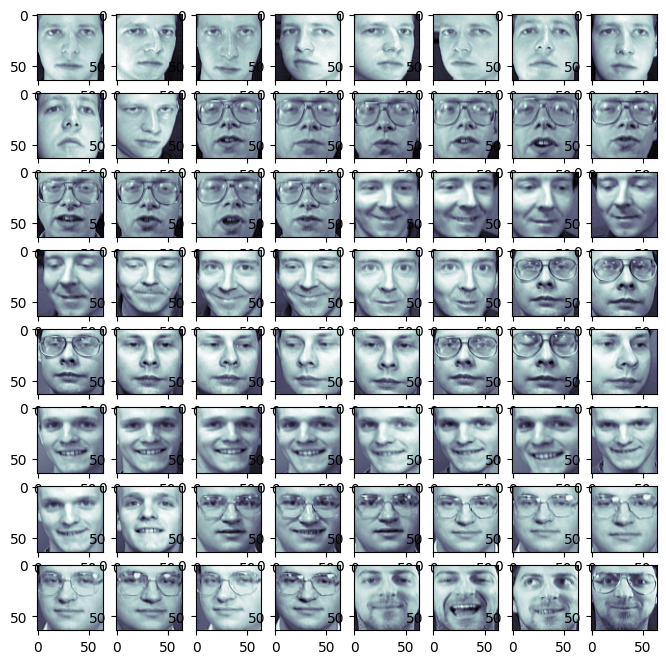

In [58]:
fig = plt.figure(figsize=(8,8))
for i in range (64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)#ax.imshow(oli.images[i])
plt.show()

In [59]:
x=oliv.data
y=oliv.target

In [60]:
pca=PCA()
pca.fit(x)

PCA()

In [61]:
pca.components_

array([[-0.00419107, -0.00710947, -0.00933617, ...,  0.00018519,
         0.00337969,  0.00318828],
       [-0.02859139, -0.03328845, -0.03784649, ...,  0.02962783,
         0.02721299,  0.02488898],
       [ 0.0013569 , -0.00032574, -0.00019794, ..., -0.01541372,
        -0.01370986, -0.01188347],
       ...,
       [ 0.00223479,  0.02056673,  0.01515908, ..., -0.0127356 ,
        -0.05848994, -0.07650357],
       [ 0.01714685,  0.02917737, -0.00942471, ...,  0.00159106,
         0.01249359, -0.0081524 ],
       [-0.00416259,  0.01549138,  0.01588172, ..., -0.0115636 ,
        -0.01614953, -0.00563289]], dtype=float32)

In [62]:
pca.components_.shape

(400, 4096)

In [63]:
pca.n_components_

400

In [64]:
k=0
total=sum(pca.explained_variance_)
currentsum=0
while currentsum/total<0.95:
    currentsum+=pca.explained_variance_[k]
    k=k+1
k

123

In [65]:
pca=PCA(n_components=k, whiten=True)#pca=PCA(n_components=k)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [66]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [67]:
x_approx_images=x_approx.reshape((400,64,64))

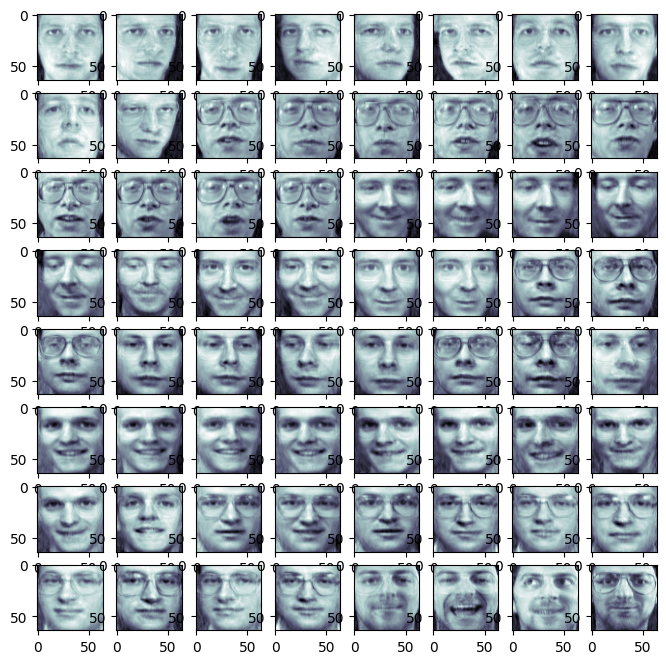

In [68]:
fig = plt.figure(figsize=(8,8))
for i in range (64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)#ax.imshow(oli.images[i])
plt.show()

eigen value and eigen vector

In [69]:
eigenv=pca.components_
eigenv.shape

(123, 4096)

In [70]:
eigenfaces=eigenv.reshape((123,64,64))

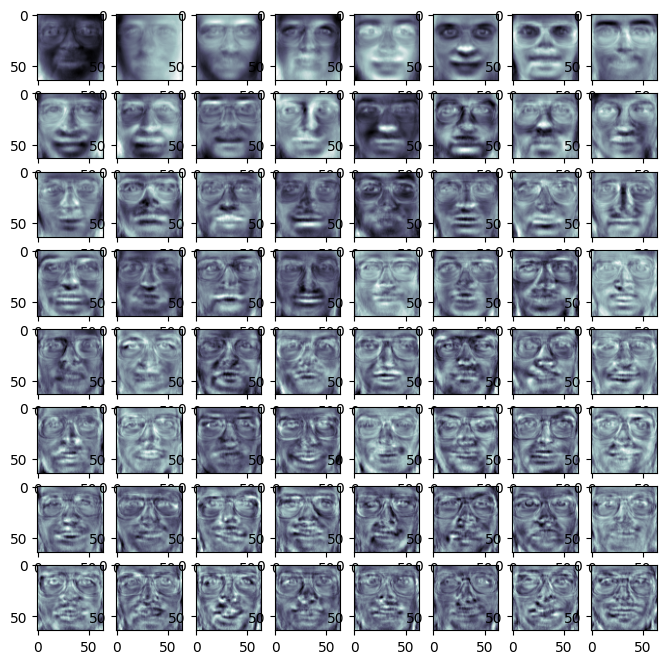

In [71]:
fig = plt.figure(figsize=(8,8))
for i in range (64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)#ax.imshow(oli.images[i])
plt.show()

CLASSIFICATION OF LFW IMAGES

In [72]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [73]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [74]:
lfw.data.shape

(1140, 1850)

In [75]:
lfw.images.shape

(1140, 50, 37)

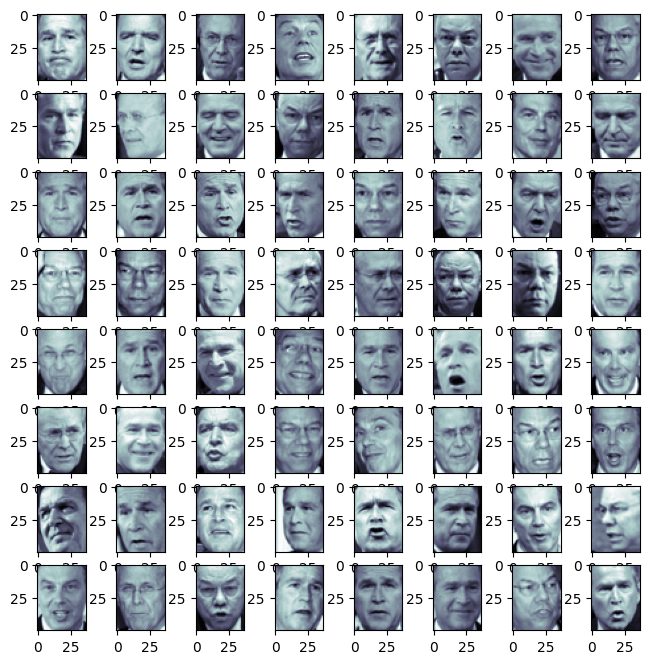

In [76]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [79]:
x,y=lfw.data,lfw.target
pca_olivii=PCA()
pca_olivii.fit(x)

PCA()

In [82]:
k=0
total=0
while total<0.99:
    total=total + pca_olivii.explained_variance_ratio_[k]
    k=k+1
k

398

In [85]:
pca_lfw=PCA(n_components=k,whiten=True)
x_transformed=pca_lfw.fit_transform(x)
x_transformed.shape

(1140, 398)

In [87]:
x_approx=pca_lfw.inverse_transform(x_transformed)
x_approx=x_approx.reshape((1140,50,37))

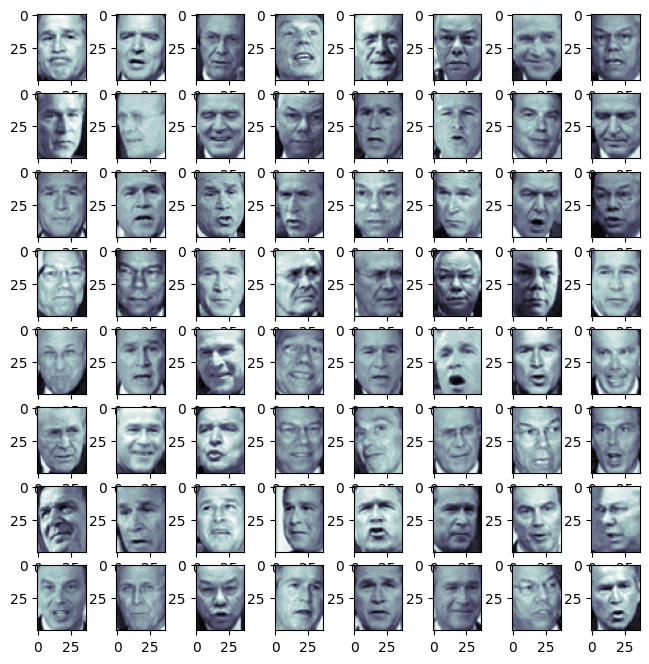

In [89]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [122]:
pca_lfw.components_.shape
eigenv=pca_lfw.components_

In [123]:
eigenv.shape

(398, 1850)

In [114]:
eigenfaces=eigenv.reshape(k,50,37)

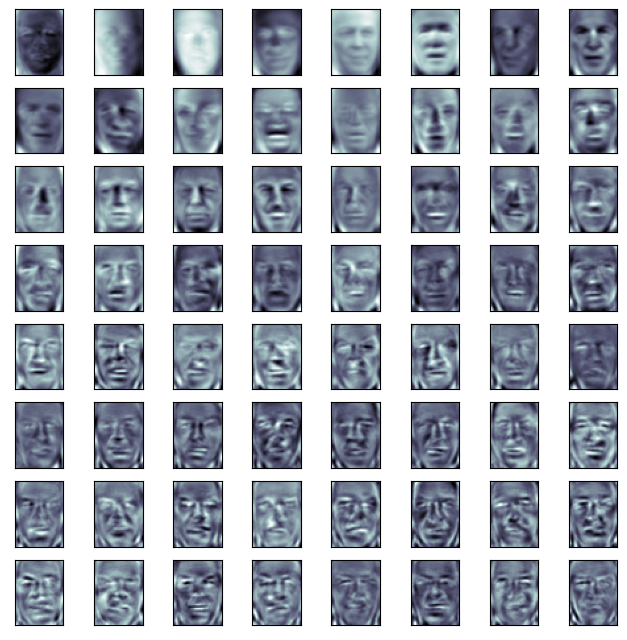

In [124]:

# Determine the correct shape
image_shape = (50, 37)  # Example shape for 1850 elements

fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(eigenv[i].reshape(image_shape), cmap=plt.cm.bone)
plt.show()